# Standard imports

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Miami Dataset

## Exploratory Data Analysis

### Storing and reading the data

In [26]:
miami_data = pd.read_csv('miami-housing.csv')
miami_data.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [27]:
miami_data.drop(['LATITUDE', 'LONGITUDE','PARCELNO'], axis = 1, inplace=True)
miami_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SALE_PRC           13932 non-null  float64
 1   LND_SQFOOT         13932 non-null  int64  
 2   TOT_LVG_AREA       13932 non-null  int64  
 3   SPEC_FEAT_VAL      13932 non-null  int64  
 4   RAIL_DIST          13932 non-null  float64
 5   OCEAN_DIST         13932 non-null  float64
 6   WATER_DIST         13932 non-null  float64
 7   CNTR_DIST          13932 non-null  float64
 8   SUBCNTR_DI         13932 non-null  float64
 9   HWY_DIST           13932 non-null  float64
 10  age                13932 non-null  int64  
 11  avno60plus         13932 non-null  int64  
 12  month_sold         13932 non-null  int64  
 13  structure_quality  13932 non-null  int64  
dtypes: float64(7), int64(7)
memory usage: 1.5 MB


In [28]:
miami_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SALE_PRC,13932.0,399941.931740,317214.683816,72000.0,235000.000,310000.00,428000.000,2650000.0
LND_SQFOOT,13932.0,8620.879917,6070.088742,1248.0,5400.000,7500.00,9126.250,57064.0
TOT_LVG_AREA,13932.0,2058.044574,813.538535,854.0,1470.000,1877.50,2471.000,6287.0
SPEC_FEAT_VAL,13932.0,9562.493468,13890.967782,0.0,810.000,2765.50,12352.250,175020.0
RAIL_DIST,13932.0,8348.548715,6178.027333,10.5,3299.450,7106.30,12102.600,29621.5
OCEAN_DIST,13932.0,31690.993798,17595.079468,236.1,18079.350,28541.75,44310.650,75744.9
WATER_DIST,13932.0,11960.285235,11932.992369,0.0,2675.850,6922.60,19200.000,50399.8
CNTR_DIST,13932.0,68490.327132,32008.474808,3825.6,42823.100,65852.40,89358.325,159976.5
SUBCNTR_DI,13932.0,41115.047265,22161.825935,1462.8,23996.250,41109.90,53949.375,110553.8
HWY_DIST,13932.0,7723.770693,6068.936108,90.2,2998.125,6159.75,10854.200,48167.3


In [29]:
miami_data.corr()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
SALE_PRC,1.000000,0.363077,0.667301,0.497500,-0.077009,-0.274675,-0.127938,-0.271425,-0.370078,0.231877,-0.123408,-0.027026,0.000325,0.383995
LND_SQFOOT,0.363077,1.000000,0.437472,0.390707,-0.083901,-0.161579,-0.055093,-0.023181,-0.159094,0.130488,0.101244,-0.005899,0.005926,-0.006686
TOT_LVG_AREA,0.667301,0.437472,1.000000,0.506064,0.075486,-0.050141,0.148343,0.136526,-0.044882,0.229497,-0.340606,-0.056545,0.002517,0.173422
SPEC_FEAT_VAL,0.497500,0.390707,0.506064,1.000000,-0.021965,-0.055155,0.013923,-0.048817,-0.151916,0.153770,-0.098780,-0.008879,-0.014012,0.188030
RAIL_DIST,-0.077009,-0.083901,0.075486,-0.021965,1.000000,0.258966,0.162313,0.444494,0.485468,-0.092495,-0.234515,-0.116955,0.010560,-0.074075
OCEAN_DIST,-0.274675,-0.161579,-0.050141,-0.055155,0.258966,1.000000,0.490764,0.245396,0.425869,0.093500,-0.159409,0.035215,-0.012723,0.209497
WATER_DIST,-0.127938,-0.055093,0.148343,0.013923,0.162313,0.490764,1.000000,0.526952,0.195280,0.400233,-0.330578,-0.096339,0.010556,-0.034343
CNTR_DIST,-0.271425,-0.023181,0.136526,-0.048817,0.444494,0.245396,0.526952,1.000000,0.766387,0.076484,-0.548287,-0.130857,0.023096,-0.330588
SUBCNTR_DI,-0.370078,-0.159094,-0.044882,-0.151916,0.485468,0.425869,0.195280,0.766387,1.000000,-0.093982,-0.385278,-0.073202,0.016334,-0.248656
HWY_DIST,0.231877,0.130488,0.229497,0.153770,-0.092495,0.093500,0.400233,0.076484,-0.093982,1.000000,-0.120505,-0.019788,-0.004547,0.193529


### Representing initial data

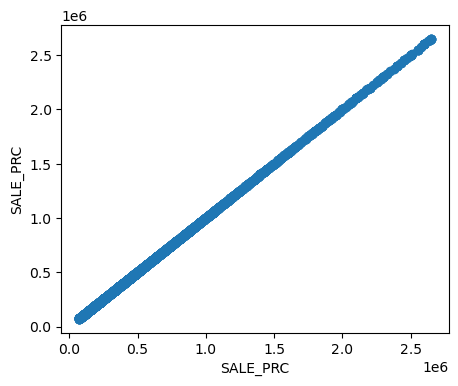

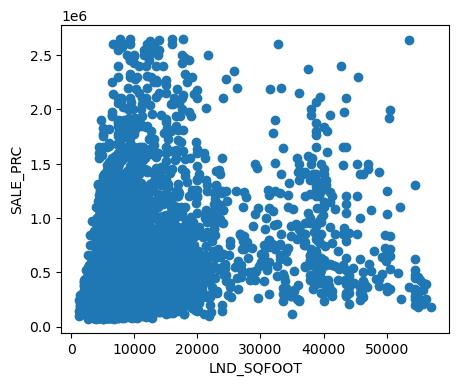

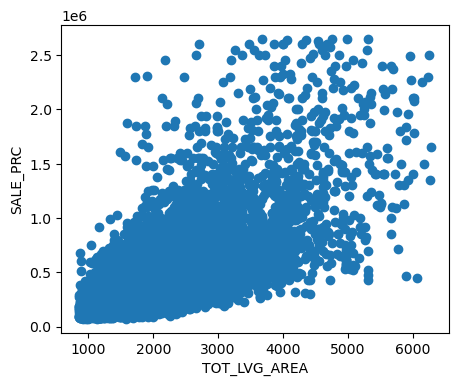

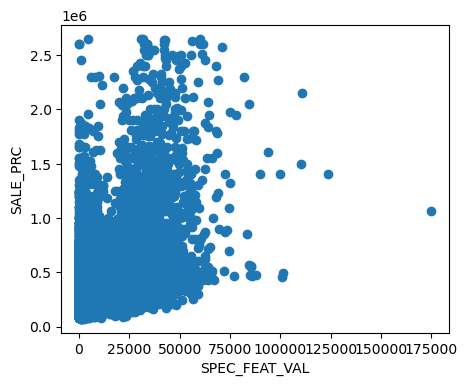

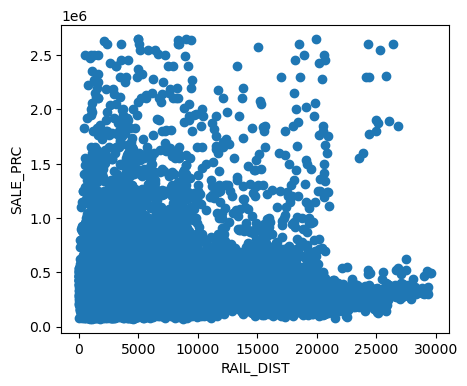

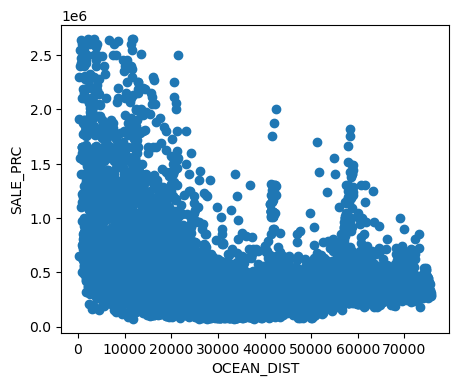

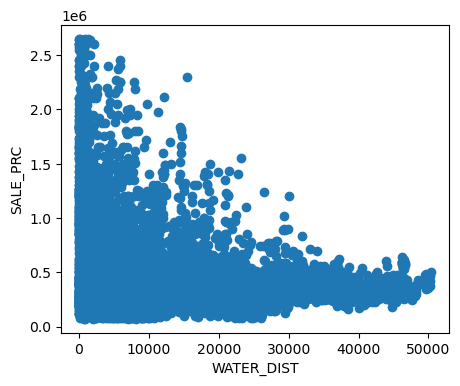

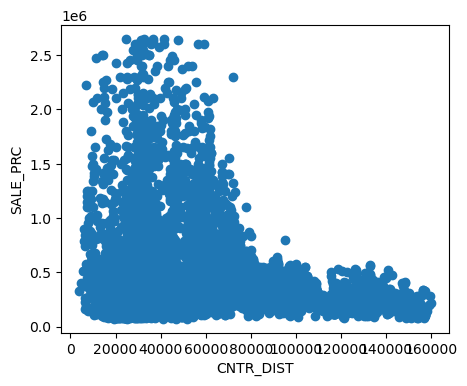

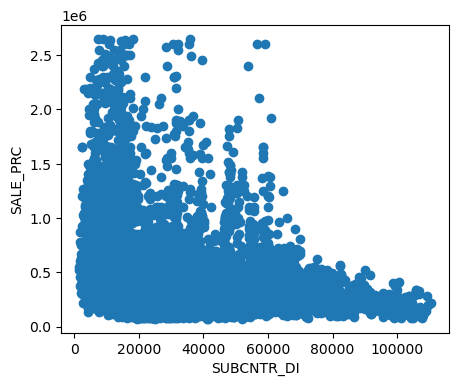

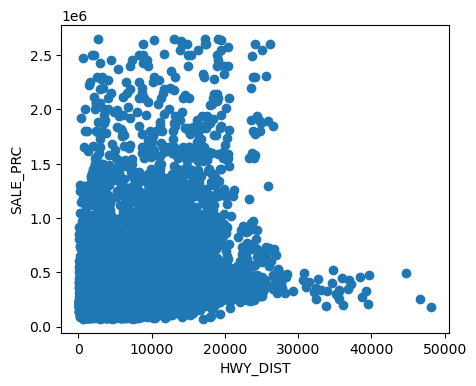

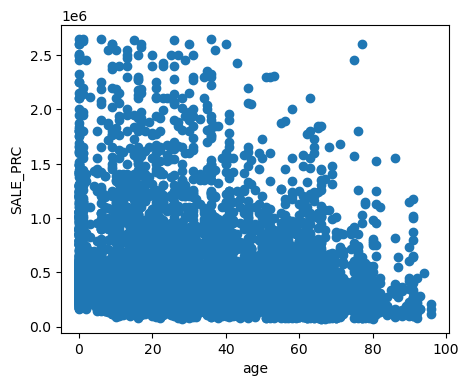

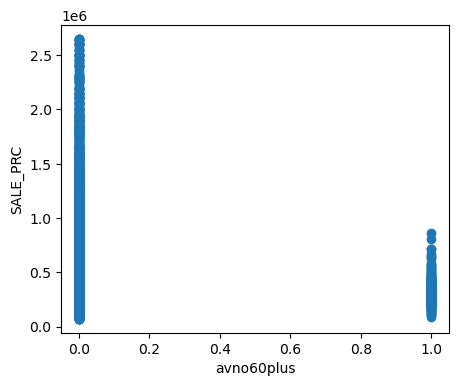

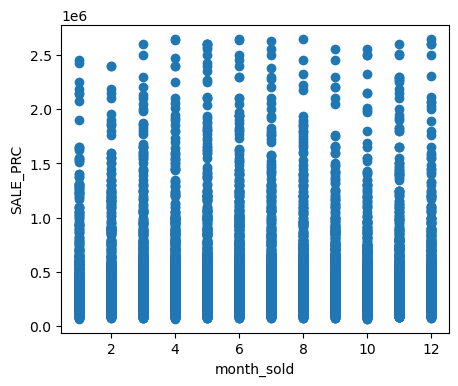

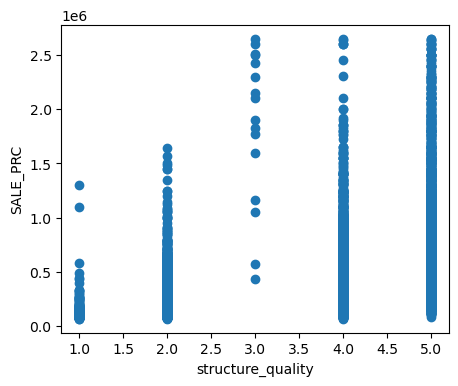

In [32]:
for feature in miami_data:
    plt.figure(figsize=(5, 4));
    plt.scatter(miami_data[feature], miami_data['SALE_PRC']);
    plt.ylabel('SALE_PRC');
    plt.xlabel(feature);
plt.show();

### Separating the data into two separate tables to show the target column

In [31]:
X_miami = miami_data.drop('SALE_PRC', axis=1)
y_miami = miami_data['SALE_PRC']

KeyError: "['MEDV'] not found in axis"

## Feature Scaling and PCA

In [ ]:
X_miami = StandardScaler().fit_transform(X_miami)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_miami)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_miami)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]
0.807317820504591


### Testing and Training the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_miami, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (404, 5)
Testing  Shape:  (102, 5)


## Evaluation Score Function

In [ ]:
def eval(y_test, predictions, results=[]):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions) * 100
    results = [mae, rmse, r2]
    print("Mean Absolute Error: ", round(mae, 5))
    print("Root Mean Squared Error: ", round(rmse, 5))
    print("R-squared (R2) Score:", round(r2, 5))
    return results

## Performing Linear Regression

### Model fitting and predictions

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.6939694417071216
Testing R^2 Score: 0.7049638109761757


### Data representation

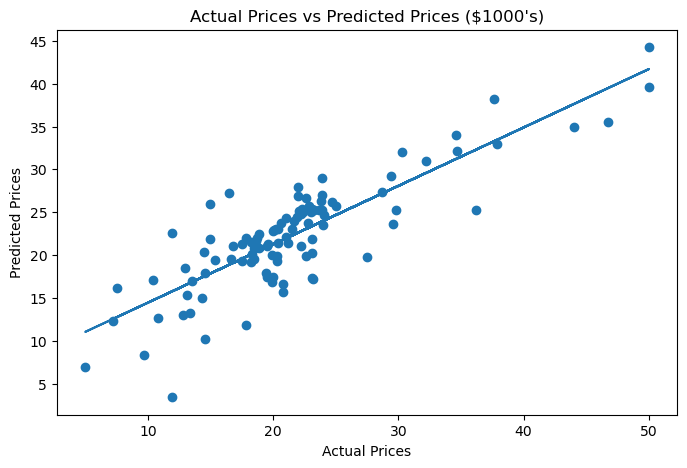

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'MEDV')

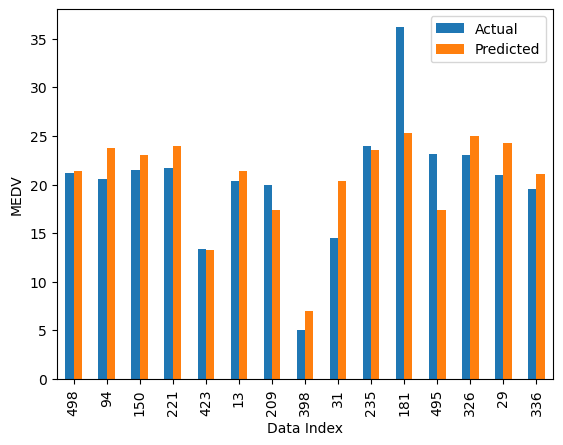

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("SALE_PRC")

### Model Evaluation

In [ ]:
results = []
lm = eval(y_test, predictions, results)

Mean Absolute Error:  3.41996
Root Mean Squared Error:  4.35912
R-squared (R2) Score: 70.49638


## Performing Random Forest

### Model fitting and predictions

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.9652592226952172
Testing R^2 Score: 0.7530864042468614


### Data representation

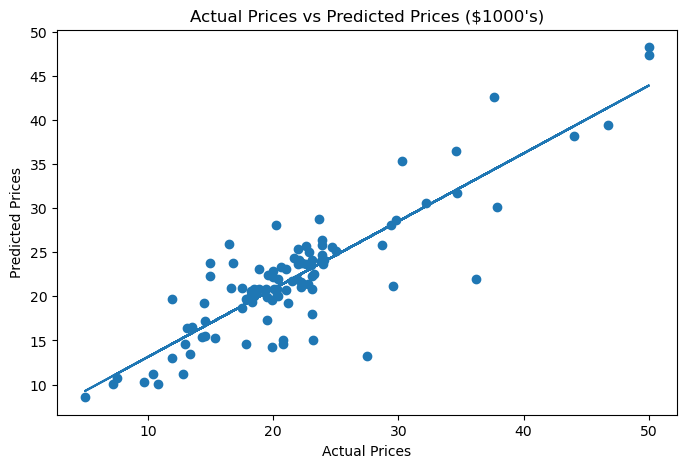

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'MEDV')

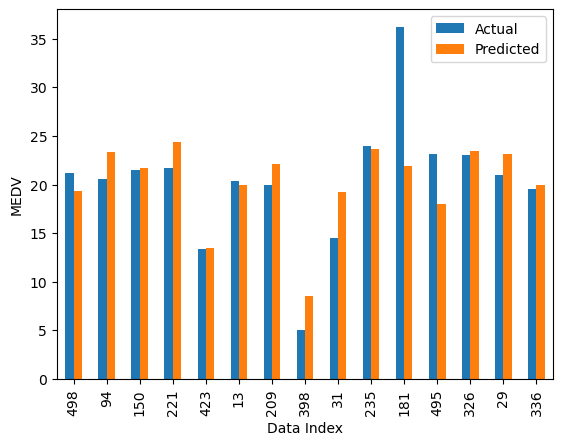

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("SALE_PRC")

### Model Evaluation

In [ ]:
rfr = eval(y_test, predictions, results)

Mean Absolute Error:  2.84318
Root Mean Squared Error:  3.9878
R-squared (R2) Score: 75.30864


We observed a lower RMSE using Random Forest Regressor

## Performing Gradient Boost

### Model fitting and predictions

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.939687168799945
Testing R^2 Score: 0.7198413449100457


### Data representation

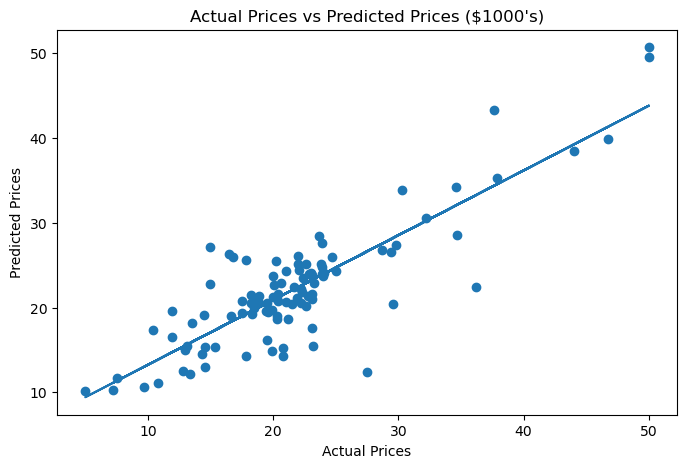

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'MEDV')

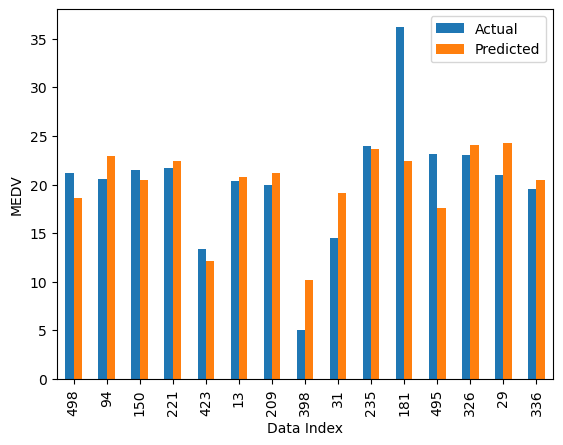

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("SALE_PRC")

### Calculating Mean Squared Error and Root Mean Squared Error

In [ ]:
gbr = eval(y_test, predictions, results)

Mean Absolute Error:  3.02852
Root Mean Squared Error:  4.24779
R-squared (R2) Score: 71.98413


We observed an even lower RMSE using Gradient Boost

## Removing Outliers

### IQR Method

In [ ]:
Q1 = miami_data[column_names].quantile(0.25)
Q3 = miami_data[column_names].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (miami_data[column_names] < lower_bound) | (miami_data[column_names] > upper_bound)
miami_data_no_outliers = miami_data[~outliers.any(axis=1)]
print(miami_data_no_outliers.shape)

(268, 14)


In [ ]:
X_miami = miami_data_no_outliers.drop('SALE_PRC', axis=1)
y_miami = miami_data_no_outliers['SALE_PRC']

In [ ]:
X_miami = StandardScaler().fit_transform(X_miami)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_miami)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_miami)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[4.17314010e-01 1.52085448e-01 1.04813962e-01 8.27542988e-02
 6.86777336e-02 5.69767746e-02 4.17383940e-02 2.39429755e-02
 1.77274952e-02 1.56668806e-02 1.30571656e-02 5.24486228e-03
 2.33425059e-34]
0.8256454522056565


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_miami, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (214, 5)
Testing  Shape:  (54, 5)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  1.91721
Root Mean Squared Error:  2.49442
R-squared (R2) Score: 65.42431


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  1.84196
Root Mean Squared Error:  2.55571
R-squared (R2) Score: 63.70451


In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  1.99122
Root Mean Squared Error:  2.66753
R-squared (R2) Score: 60.45902


### Outlier Capping Method

In [ ]:
miami_data_no_outliers = miami_data.copy()
for col in column_names:
    miami_data_no_outliers[col] = miami_data[col].clip(lower_bound[col], upper_bound[col])
print(miami_data_no_outliers.shape)

(506, 14)


In [ ]:
X_miami = miami_data_no_outliers.drop('SALE_PRC', axis=1)
y_miami = miami_data_no_outliers['SALE_PRC']

In [ ]:
X_miami = StandardScaler().fit_transform(X_miami)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_miami)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_miami)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[5.46669028e-01 1.07559400e-01 9.82781530e-02 7.51201883e-02
 5.32865988e-02 3.31876052e-02 2.60815533e-02 1.80281703e-02
 1.55755729e-02 1.40510093e-02 8.10711915e-03 4.05560210e-03
 2.07217978e-35]
0.8809133677127593


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_miami, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (404, 5)
Testing  Shape:  (102, 5)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_cap = eval(y_test, predictions, results)

Mean Absolute Error:  3.11333
Root Mean Squared Error:  4.0032
R-squared (R2) Score: 65.2143


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_cap = eval(y_test, predictions, results)

Mean Absolute Error:  2.86714
Root Mean Squared Error:  4.17057
R-squared (R2) Score: 62.24491


In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_cap = eval(y_test, predictions, results)

Mean Absolute Error:  2.88388
Root Mean Squared Error:  4.12371
R-squared (R2) Score: 63.08854


### Z Score Method

In [ ]:
miami_data_no_outliers = miami_data.copy()
z_scores = (miami_data[column_names] - miami_data[column_names].mean()) / miami_data[column_names].std()

threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

miami_data_no_outliers = miami_data[~outliers.any(axis=1)]
print(miami_data_no_outliers.shape)

(415, 14)


In [ ]:
X_miami = miami_data_no_outliers.drop('SALE_PRC', axis=1)
y_miami = miami_data_no_outliers['SALE_PRC']

In [ ]:
X_miami = StandardScaler().fit_transform(X_miami)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_miami)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_miami)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[4.99833031e-01 1.10771925e-01 9.85260583e-02 8.31328313e-02
 6.10277845e-02 3.73189595e-02 3.50665904e-02 2.11749134e-02
 1.89855647e-02 1.48521665e-02 1.33406612e-02 5.96951372e-03
 8.42978329e-34]
0.8532916305533436


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_miami, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (332, 5)
Testing  Shape:  (83, 5)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_z = eval(y_test, predictions, results)

Mean Absolute Error:  3.35141
Root Mean Squared Error:  4.33556
R-squared (R2) Score: 73.79358


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_z = eval(y_test, predictions, results)

Mean Absolute Error:  2.70401
Root Mean Squared Error:  3.99318
R-squared (R2) Score: 77.76922


In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_z = eval(y_test, predictions, results)

Mean Absolute Error:  2.91206
Root Mean Squared Error:  4.06694
R-squared (R2) Score: 76.94032


## Hyperparameter Tuning

## Summary

In [ ]:
model_metrics_dict = {
    'Linear': lm,
    'Random Forest': rfr,
    'Gradient Boost': gbr,
    'Linear(IQR)': lm_iqr,
    'Random Forest(IQR)': rfr_iqr,
    'Gradient Boost(IQR)': gbr_iqr,
    'Linear(Cap)': lm_cap,
    'Random Forest(Cap)': rfr_cap,
    'Gradient Boost(Cap)': gbr_cap,
    'Linear(Z-Score)': lm_z,
    'Random Forest(Z-Score)': rfr_z,
    'Gradient Boost(Z-Score)': gbr_z
}

# Initialize empty lists for each metric
model_names = []
mae_values = []
rmse_values = []
r2_values = []

# Populate lists with model names and corresponding metrics
for model_name, metrics in model_metrics_dict.items():
    model_names.append(model_name)
    mae_values.append(metrics[0])
    rmse_values.append(metrics[1])
    r2_values.append(metrics[2])

# Create DataFrame with columns for each metric
model_metrics = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R2': r2_values
})

# Display the DataFrame
print(model_metrics)

                      Model       MAE      RMSE         R2
0                    Linear  3.419961  4.359121  70.496381
1             Random Forest  2.843176  3.987804  75.308640
2            Gradient Boost  3.028521  4.247792  71.984134
3               Linear(IQR)  1.917206  2.494424  65.424314
4        Random Forest(IQR)  1.841963  2.555708  63.704514
5       Gradient Boost(IQR)  1.991222  2.667526  60.459017
6               Linear(Cap)  3.113335  4.003203  65.214297
7        Random Forest(Cap)  2.867143  4.170566  62.244911
8       Gradient Boost(Cap)  2.883885  4.123708  63.088543
9           Linear(Z-Score)  3.351412  4.335560  73.793582
10   Random Forest(Z-Score)  2.704012  3.993178  77.769219
11  Gradient Boost(Z-Score)  2.912064  4.066942  76.940318
